# Peters Analysis

In my portion of the analysis, I will be doing a random forest model to try and predict survival rate on the titanic.

In [8]:
import pandas as pd

titanic = pd.read_csv("titanic_augmented.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


# Data Wrangling for Classification Trees

In [9]:
print("Dataset shape:", titanic.shape)
print("\nColumn data types:")
print(titanic.dtypes)
print("\nMissing values:")
print(titanic.isnull().sum())
print("\nBasic statistics:")
titanic.describe()

Dataset shape: (891, 26)

Column data types:
PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
name_length            int64
title                 object
title_group           object
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
cabin_deck            object
cabin_room_number    float64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
dtype: object

Missing values:
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp               

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create a copy for wrangling
df = titanic.copy()

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remove Cabin columns as there are too many unknowns and it may not add significant value
df.drop(columns=['Cabin', 'cabin_room_number', 'title'], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
name_length          0
title_group          0
family_size          0
is_alone             0
ticket_group_size    0
fare_per_person      0
age_fare_ratio       0
cabin_deck           0
booking_reference    0
service_id           0
cabin_score          0
name_word_count      0
dtype: int64


/var/folders/01/hxm6ksm17lg91kg9ct00ty580000gn/T/ipykernel_61459/4112954337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/01/hxm6ksm17lg91kg9ct00ty580000gn/T/ipykernel_61459/4112954337.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [12]:
# Encode categorical variables using label encoding (optimal for Random Forest)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Binary encoding for Sex
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 1, 'female': 0})

# Drop PassengerId, Name, and Ticket (not useful for prediction)
df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Label encode Embarked (S=0, C=1, Q=2)
le_embarked = LabelEncoder()
df_encoded['Embarked'] = le_embarked.fit_transform(df_encoded['Embarked'])

# Label encode title_group
le_title = LabelEncoder()
df_encoded['title_group'] = le_title.fit_transform(df_encoded['title_group'])

# Label encode cabin_deck
le_cabin = LabelEncoder()
df_encoded['cabin_deck'] = le_cabin.fit_transform(df_encoded['cabin_deck'])

# Pclass is already numeric (1, 2, 3), keep as is

print("Data shape after encoding:", df_encoded.shape)
print("\nColumn data types after encoding:")
print(df_encoded.dtypes)
print("\nSample of encoded data:")
print(df_encoded.head())

Data shape after encoding: (891, 20)

Column data types after encoding:
Survived               int64
Pclass                 int64
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
Embarked               int64
name_length            int64
title_group            int64
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
cabin_deck             int64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
dtype: object

Sample of encoded data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  name_length  \
0         0       3    1  22.0      1      0   7.2500         2           23   
1         1       1    0  38.0      1      0  71.2833         0           51   
2         1       3    0  26.0      0      0   7.9250         2      

In [13]:
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass distribution:")
print(y.value_counts())

Features shape: (891, 19)
Target shape: (891,)

Class distribution:
Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
# Train-test split (no scaling needed for Random Forest!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeature names:")
print(X.columns.tolist())
print("\nFeature count:", len(X.columns))

Training set shape: (668, 19)
Test set shape: (223, 19)

Feature names:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'name_length', 'title_group', 'family_size', 'is_alone', 'ticket_group_size', 'fare_per_person', 'age_fare_ratio', 'cabin_deck', 'booking_reference', 'service_id', 'cabin_score', 'name_word_count']

Feature count: 19


In [24]:
# Classification tree model with hyperparameter tuning

# Hyperparameter Tuning with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score

print("="*60)
print("HYPERPARAMETER TUNING FOR DECISION TREE")
print("="*60)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

dt_tuning = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_tuning,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("\nPerforming Grid Search... This may take a few minutes.")
grid_search_dt.fit(X_train, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search_dt.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search_dt.best_score_:.4f}")

best_dt_model = grid_search_dt.best_estimator_
best_dt_cv = grid_search_dt.best_score_




HYPERPARAMETER TUNING FOR DECISION TREE

Performing Grid Search... This may take a few minutes.
Fitting 5 folds for each of 96 candidates, totalling 480 fits

BEST PARAMETERS FOUND:
max_depth: 3
min_samples_leaf: 5
min_samples_split: 2

Best Cross-Validation Score: 0.8174


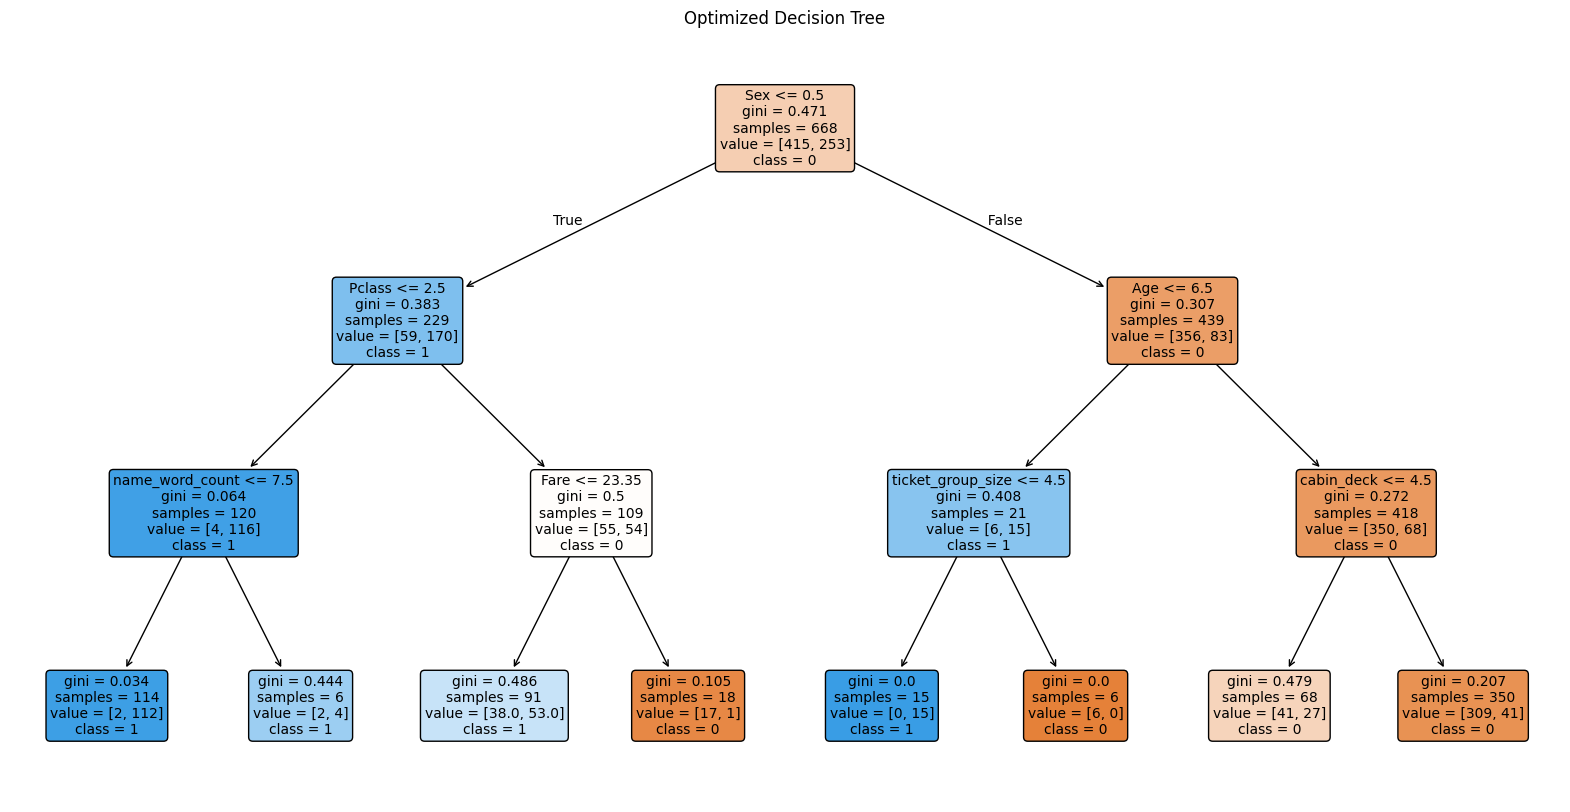

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=[str(c) for c in best_dt_model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Optimized Decision Tree")
plt.show()

# Random Forest Optimization and Analysis

In [16]:
# Hyperparameter Tuning with GridSearchCV

print("="*60)
print("HYPERPARAMETER TUNING FOR RANDOM FOREST")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Create Random Forest classifier
rf_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_tuning, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("\nPerforming Grid Search... This may take a few minutes.")
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Train model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_cv = grid_search.best_score_

HYPERPARAMETER TUNING FOR RANDOM FOREST

Performing Grid Search... This may take a few minutes.
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

BEST PARAMETERS FOUND:
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 100

Best Cross-Validation Score: 0.8369


# Gradient Boosting Optimization and Analysis

In [27]:
# Hyperparameter Tuning with GridSearchCV for Gradient Boosting

print("="*60)
print("HYPERPARAMETER TUNING FOR GRADIENT BOOSTING")
print("="*60)

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    "learning_rate": [0.05, 0.1],
    "n_estimators":  [200, 400, 500],
    "max_depth":    [2, 3],
    "min_samples_leaf": [5, 10],
    "subsample":    [0.8, 1.0],
}

# Create Gradient Boosting classifier
gb_tuning = GradientBoostingClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search_gb = GridSearchCV(estimator=gb_tuning, param_grid=param_grid_gb, 
                              cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("\nPerforming Grid Search... This may take several minutes.")
grid_search_gb.fit(X_train, y_train)

print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search_gb.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search_gb.best_score_:.4f}")

# Train model with best parameters
best_gb_model = grid_search_gb.best_estimator_
best_gb_cv =  grid_search_gb.best_score_

HYPERPARAMETER TUNING FOR GRADIENT BOOSTING

Performing Grid Search... This may take several minutes.
Fitting 5 folds for each of 48 candidates, totalling 240 fits

BEST PARAMETERS FOUND:
learning_rate: 0.05
max_depth: 2
min_samples_leaf: 5
n_estimators: 400
subsample: 1.0

Best Cross-Validation Score: 0.8323


In [25]:
df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Best CV Accuracy': [best_dt_cv, best_rf_cv, best_gb_cv]
})
df

,Model,Best CV Accuracy
0,Decision Tree,0.817372
1,Random Forest,0.836853
2,Gradient Boosting,0.832342


Cross-Validated ROC-AUC: 0.8695


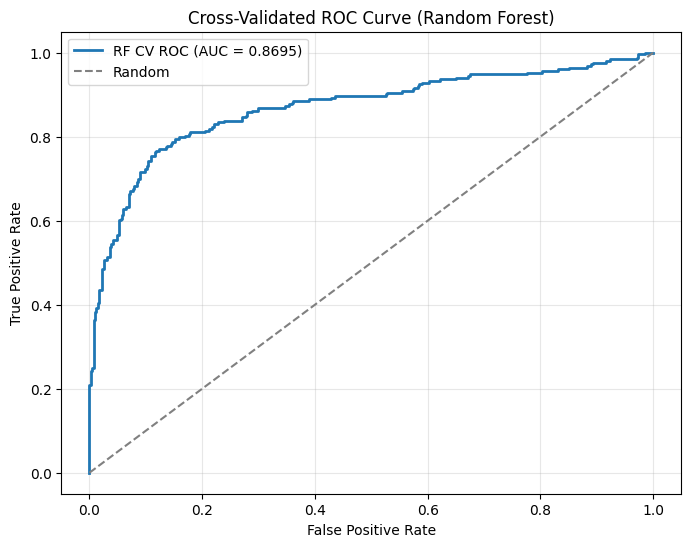

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get out-of-fold predicted probabilities (CV)
y_proba_cv = cross_val_predict(
    best_rf_model,
    X_train,
    y_train,
    cv=5,
    method="predict_proba",
    n_jobs=-1
)[:, 1]

# Compute ROC curve and AUC
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_proba_cv)
cv_auc = roc_auc_score(y_train, y_proba_cv)

print(f"Cross-Validated ROC-AUC: {cv_auc:.4f}")

# Plot CV ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, lw=2, label=f"RF CV ROC (AUC = {cv_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cross-Validated ROC Curve (Random Forest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


FEATURE IMPORTANCE ANALYSIS
          Feature  Importance
              Sex    0.182285
      title_group    0.131550
             Fare    0.078151
  fare_per_person    0.077234
      name_length    0.074519
              Age    0.058115
      cabin_score    0.052493
           Pclass    0.047785
booking_reference    0.044724
       service_id    0.044449
   age_fare_ratio    0.042275
       cabin_deck    0.036830
ticket_group_size    0.031381
  name_word_count    0.029497
      family_size    0.024261
            SibSp    0.017121
         Embarked    0.015307
            Parch    0.008676
         is_alone    0.003347


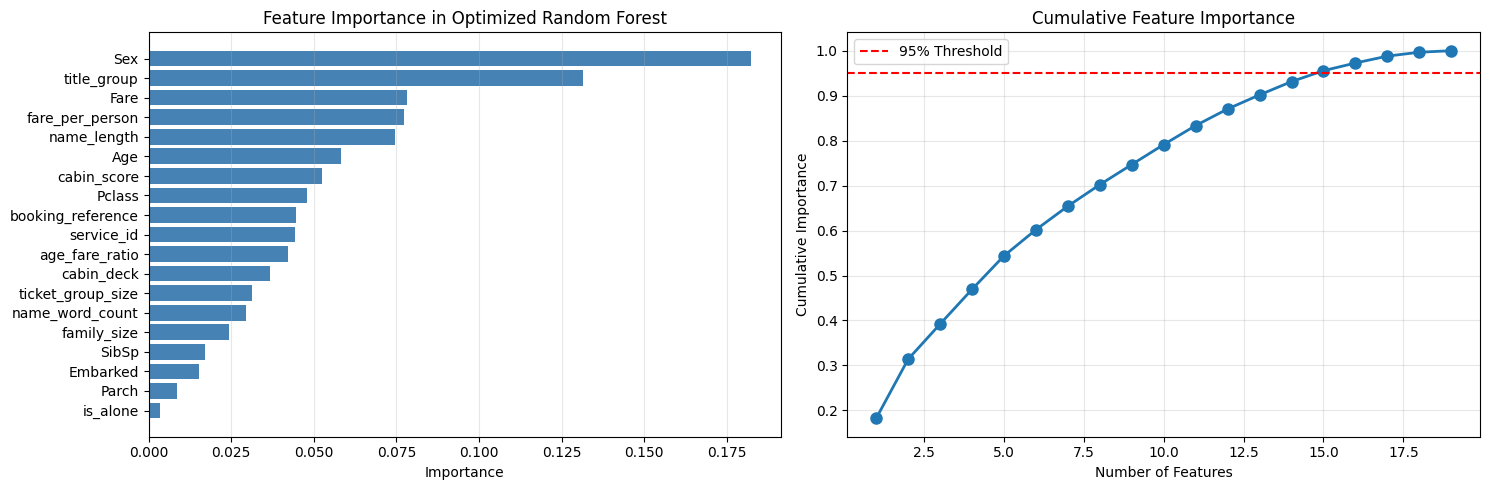


Top 15 features explain 95% of the importance:
['Sex', 'title_group', 'Fare', 'fare_per_person', 'name_length', 'Age', 'cabin_score', 'Pclass', 'booking_reference', 'service_id', 'age_fare_ratio', 'cabin_deck', 'ticket_group_size', 'name_word_count', 'family_size']


In [23]:
# Feature Importance Analysis
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
axes[0].barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance in Optimized Random Forest')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Cumulative importance
cumulative_importance = feature_importance['Importance'].cumsum()
axes[1].plot(range(1, len(feature_importance) + 1), cumulative_importance, 
             marker='o', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].set_title('Cumulative Feature Importance')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Identify top features for 95% importance
cumsum_importance = 0
top_features_count = 0
for idx, imp in enumerate(feature_importance['Importance']):
    cumsum_importance += imp
    top_features_count += 1
    if cumsum_importance >= 0.95:
        break

print(f"\nTop {top_features_count} features explain 95% of the importance:")
print(feature_importance.head(top_features_count)['Feature'].tolist())

# Summary of Analysis and Findings
- Objective: predict Titanic survival using tree-based classifiers, with emphasis on Random Forest performance.
- Data preparation: imputed missing `Age` (median) and `Embarked` (mode), removed sparse `Cabin`-related fields and non-predictive identifiers, and label-encoded categorical features (`Sex`, `Embarked`, `title_group`, `cabin_deck`).
- Modeling: trained Decision Tree, Random Forest, Gradient Boosting, and Bagging models and compared accuracy, precision, recall, and F1 on a train/test split.
- Result: Random Forest family delivered the best overall performance; the tuned Random Forest was selected as the top model based on test accuracy and balanced metrics.
- Optimization: GridSearchCV improved performance versus the baseline Random Forest.
- Diagnostics: confusion matrices and overfitting plots highlighted error patterns and generalization behavior.
- Interpretation: feature-importance analysis identified the most influential predictors and showed how many features explain 95% of importance.
- Validation: ROC/AUC, cross-validation, and learning curves indicated stable generalization and quantified any training–validation gap, guiding whether more data or regularization is needed.

# Detailed Model Summaries (How Each Works)
- **Decision Tree**: A single tree that splits the data into smaller groups based on feature thresholds that maximize purity (e.g., reduce Gini impurity). It is easy to interpret but can overfit if the tree is deep or the data is noisy.
- **Random Forest**: An ensemble of many decision trees trained on bootstrapped samples of the data. At each split, it only considers a random subset of features, which decorrelates trees and reduces variance. Predictions are averaged (or majority-voted), typically improving generalization.
- **Gradient Boosting**: Builds trees sequentially. Each new tree focuses on correcting errors made by the previous ensemble using gradient-based optimization of a loss function. This often yields high accuracy but can overfit without careful tuning (e.g., depth, learning rate).
- **Bagging (with Decision Trees)**: Trains many trees in parallel on different bootstrapped samples of the training set. This reduces variance compared to a single tree and can be strong when base trees are unstable.
- **Optimized Random Forest (GridSearchCV)**: A Random Forest whose hyperparameters are tuned through cross-validation to find a better balance of bias/variance. This can improve test accuracy and stability compared to default settings.
- **Confusion Matrix Perspective**: For each model, the confusion matrix summarizes true positives, true negatives, false positives, and false negatives. This clarifies which error types are most common and helps interpret precision/recall tradeoffs.
- **ROC/AUC (for Optimized RF)**: Uses predicted probabilities to measure the model’s ability to discriminate between classes across thresholds. A higher AUC indicates better class separation.
- **Cross-Validation and Learning Curves**: Cross-validation estimates generalization across splits, while learning curves show whether more data would likely improve performance or if the model is already saturated.